In [117]:
import numpy as np
import pandas as pd
#import xgboost
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.interactive(True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [95]:
%matplotlib inline

In [96]:
df = pd.read_csv("./data/unimelb_training.csv")

/home/ramya/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
df["Sponsor.Code"] = df["Sponsor.Code"].fillna(df["Sponsor.Code"].value_counts().index[0])
df = df.join(pd.get_dummies(df["Sponsor.Code"], prefix = "S"))
#df.drop(["Sponsor.Code"], axis = 1, inplace = True)


df["Grant.Category.Code"] = df["Grant.Category.Code"].fillna(df[
        "Grant.Category.Code"].value_counts().index[0])
df = df.join(pd.get_dummies(df["Grant.Category.Code"], prefix = "G"))
#df.drop(["Grant.Category.Code"], axis = 1, inplace = True)



df["Contract.Value.Band...see.note.A"] = df["Contract.Value.Band...see.note.A"].fillna(
    df["Contract.Value.Band...see.note.A"].value_counts().index[0])

df["Sponsor.Code"] = df["Sponsor.Code"].astype('category', ordered = False)

df["Grant.Category.Code"] = df["Grant.Category.Code"].astype('category', ordered = False)

df["Start.date"] = pd.to_datetime(df["Start.date"])
df["Start.date"] = df["Start.date"].astype('int64')//1e15

In [98]:
df.drop(["Sponsor.Code"], axis = 1, inplace = True)
df.drop(["Grant.Category.Code"], axis = 1, inplace = True)

In [99]:
contract_value_ordered = ['A ', 'B ', 'C ', 'D ', 'E ', 'F ', 'G ', 'H ', 'I ', 'J ', 'K ', 'L ', 'M ',
                         'N ', 'O ', 'P ', 'Q ']
df['Contract.Value.Band...see.note.A'] = df["Contract.Value.Band...see.note.A"].astype(
    'category', ordered = True, categories = contract_value_ordered).cat.codes

In [100]:
for feature in ["RFCD.Code.", "RFCD.Percentage.", "SEO.Code.", "SEO.Percentage."]:
    for i in range(1, 6):
        df[feature+str(i)] = df[feature+str(i)].fillna(0)

In [101]:
RFCD_dummy = pd.DataFrame()
for i in range(1, 6):
    RFCD_dummy = RFCD_dummy.add(pd.get_dummies(df["RFCD.Code." + str(i)],
                                       columns = ["RFCD.Code." + str(i)], prefix = "RFCD").multiply(
                                       df["RFCD.Percentage." + str(i)],axis = 0), 
                        fill_value = 0.0)

In [102]:
SEO_dummy = pd.DataFrame()
for i in range(1, 6):
    SEO_dummy = SEO_dummy.add(pd.get_dummies(df["SEO.Code." + str(i)],
                                       columns = ["SEO.Code." + str(i)], prefix = "SEO").multiply(
                                       df["SEO.Percentage." + str(i)],axis = 0), 
                        fill_value = 0.0)

In [103]:
df2 = df.join(RFCD_dummy.join(SEO_dummy))

In [104]:
for i in range(1,6):
    df2.drop(["RFCD.Code." + str(i), "RFCD.Percentage." + str(i),
                 "SEO.Code." + str(i), "SEO.Percentage." + str(i)],
                   axis = 1, inplace = True)


___
** Droping all columns with NaN values (have to modify after data cleaning)**
___

In [105]:
df2.dropna(axis = 1, how = 'any', inplace = True)

___
** After data cleansing for the remaining set of columns, please check this **
___

In [106]:
y = df2["Grant.Status"]
X = df2.drop(["Grant.Status"], axis = 1)

In [107]:
X["Start.date"] = X["Start.date"].astype('int64')//1e15

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

## Random Forest Classifier Model

In [109]:
model = RandomForestClassifier(n_estimators = 45, max_depth = 15, 
                               min_samples_split = 4, min_samples_leaf = 2,
                               oob_score = True, random_state = 1)

In [110]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=45, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [111]:
score = model.oob_score_

In [91]:
score

0.7133716160787531

In [92]:
score = model.score(X_test, y_test)

In [93]:
score

0.72789896670493681

## Logistic Regression

## Making predictions

__Linear Regression__

Check with different features

In [124]:
names = [
        "Neural Net", 
        #"Logistic Regression", 
        #"Nearest Neighbors", 
        #"Linear SVM", 
        #"RBF SVM", 
        #"Gaussian Process",
        #"Decision Tree", 
        "Random Forest", 
        #"AdaBoost",
        #"Naive Bayes", 
        #"QDA"
        ]


In [125]:
classifiers = [
        MLPClassifier(alpha=0.001),
        #LogisticRegression(C=1e-10, penalty='l2', tol=1e-6),
        #KNeighborsClassifier(3),
        #SVC(kernel="linear", C=0.025),
        #SVC(gamma=2, C=1),
        #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
        #DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(n_estimators = 45, max_depth = 15, 
                               min_samples_split = 4, min_samples_leaf = 2,
                               oob_score = True, random_state = 1),
        #AdaBoostClassifier(),
        #GaussianNB(),
        #QuadraticDiscriminantAnalysis()
        ]

Neural Net
True positives: 0.4354971240755957
False negatives: 0.5645028759244043
True negatives: 0.7822349570200573
True positives: 0.2177650429799427

ROC AUC: 0.61


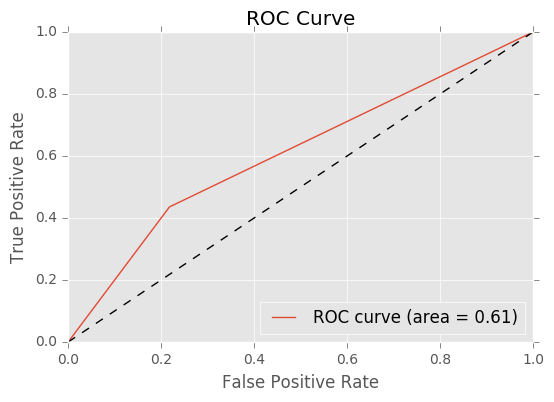

Random Forest
True positives: 0.6170912078882498
False negatives: 0.3829087921117502
True negatives: 0.8244985673352435
True positives: 0.17550143266475646

ROC AUC: 0.72


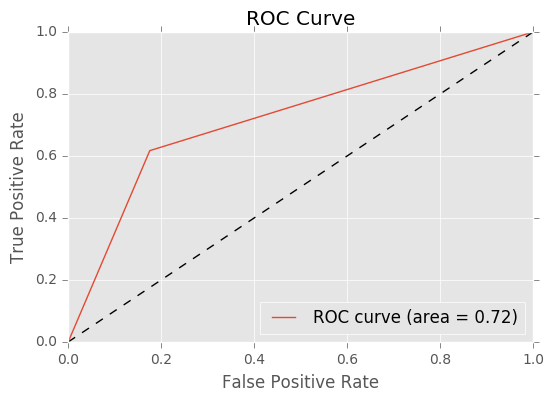

In [126]:
cms = {}
n_neg = float(y_test.value_counts()[0])
n_pos = float(y_test.value_counts()[1])
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cms[name] = cm
    print("True positives: {}".format(cm[1,1] / n_pos))
    print("False negatives: {}".format(cm[1,0] / n_pos))
    print("True negatives: {}".format(cm[0,0] / n_neg))
    print("True positives: {}".format(cm[0,1] / n_neg))
    print("")
    fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
    
    roc_auc = auc(fpr, tpr)
    print("ROC AUC: %0.2f" % roc_auc)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [116]:
for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train, y_train)
    clf.apply

Random Forest
